In [10]:
import numpy as np
import matplotlib.pyplot as plt

import time

In [14]:

# define a generator function for the polynomial
def generator_function(x,*par):
    return par[0]+par[1]*x+par[2]*x*x+par[3]*x*x*x

# Set the x limits, and the number of points, and calculate the interval
xl = -4.0
xh = 4.0
npoints = 10000

dx = (xh-xl)/npoints

xroots = []
yroots = []

par = np.array([1.80,-4.05,0.40,1.0])

In [15]:
# Define the data arrays (x and y)
xval = np.arange(xl,xh,dx)
yval = generator_function(xval,*par)

In [16]:
start = time.time()

# Define the size of the "slices" in x in which we will look for roots.
nsearch = 1000

# calculate the number of slices
niter = npoints/nsearch

# use the left most data point in the first slice as the comparison point, and keep track of the number of roots found
ycomp = yval[0]
nroots_found = 0

# loop over the slices
for i in range(0,int(niter)):
    # Begin at the right most data point in the slice
    y = yval[nsearch*i]
    
    # Check to see if we got lucky and landed on an exact zero of the function
    if (y==0):
        print ("Found exact root at x = %f\n" % xval[nsearch*i])
        xroots.append(xval[nsearch*i])
        yroots.append(0.0)
        nroots_found = nroots_found + 1
    # Otherwise, check to see if there is a root in between the left and right comparison points
    if (y*ycomp<0.0):
        # There is a root in the interval, so apply Newton's algorithm / bisection method
        #
        # First, get the x-values of the left and right ends of the slice
        xlow = xval[nsearch*(i-1)]
        xhigh = xval[nsearch*i]
        # define a "tolerance" at which point we will say we have found a zero
        epsilon = 1.48E-8
        
        diff = 1.0E12
        while (diff>epsilon):
            # Calculate the function values at the left, right, and midpoints of the slice
            fa = generator_function(xlow,*par)
            fb = generator_function(xhigh,*par)
            xmid = (xhigh+xlow)/2.0
            fc = generator_function(xmid,*par)
            
            # Decide if the root is in the left half or right half of the interval, and redefine
            # the x interval accordingly
            product = fa*fc
            if (product < 0):
                xhigh = xmid
            else:
                xlow = xmid

            # update the difference value
            diff = np.abs(fc)

        print ("Found root at x = %f\n" % xmid)
        xroots.append(xmid)
        yroots.append(0.0)
        nroots_found = nroots_found + 1
        
        # move to the next slice
        ycomp = y
    else:
        # move to the next slice
        ycomp = y

print ("Total number of roots found = %d\n" % nroots_found)

end = time.time()
print(end - start)
time_ejb = (end-start)

Found root at x = -2.400000

Found root at x = 0.500000

Found root at x = 1.500000

Total number of roots found = 3

0.0009610652923583984


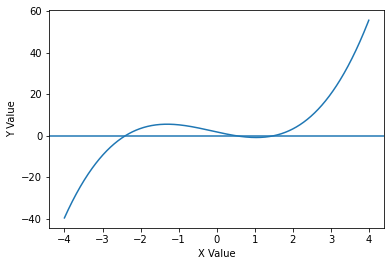

In [ ]:
# Generate the figure and the axes 
fig, axs = plt.subplots(nrows=1, ncols=1) 

# On the first axis, plot the sine and label the ordinate 
axs.plot(xval,yval)
axs.scatter(xroots,yroots)
axs.set_ylabel('Y Value')
axs.set_xlabel('X Value')
axs.axhline()
plt.show()

In [ ]:
# Now, use Newton's method that is found in scipy.optimize

from scipy import optimize

start = time.time()

dx_search = (xh-xl)/niter
x_search=np.arange(xl,xh+dx_search,dx_search)+0.1
    
xroots = optimize.newton(generator_function,x_search,args=par)
yroots = np.zeros(len(xroots))

print (xroots)
    
end = time.time()
print(end - start)

time_scipy = end - start

[-2.4  1.5]
0.0012497901916503906


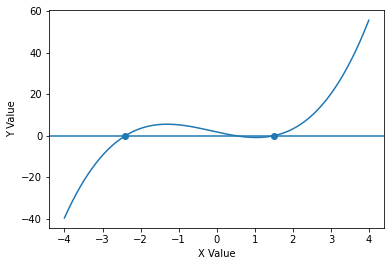

In [ ]:
# Generate the figure and the axes 
fig, axs = plt.subplots(nrows=1, ncols=1) 

# On the first axis, plot the sine and label the ordinate 
axs.plot(xval,yval)
axs.scatter(xroots,yroots)
axs.set_ylabel('Y Value')
axs.set_xlabel('X Value')
axs.axhline()
plt.show()

In [ ]:
print ("Ratio = ",time_ejb/time_scipy)

Ratio =  0.6007249141549027


## Conclusions

1.  The scipy.optimize.newton function is about 3-4 times faster than my method.  This is not surprising.
2.  My method is more robust, does not require any knowledge of where the roots are, and always works.



1.   Part a: For f(x)=1.80-4.05x+0.40x+x^3 there were three roots. The roots were -2.400000, 0.500000, and 1.500000.
2.   Part b: Plotted the requested polynomial in "HW1 Q1 root_find_complete.ipynb".

1. Parts c and d: I also changed the data points from 10,000 to 1,000. No roots were found. For 100,000 data points three roots were found. I adjusted the polynomial to f(x)=1.80-4.05x^2+x^4 at 100,000 data points two roots were found. At 10,000 data points two roots were found. At 1,000 data points no roots were found. I adjusted the polynomial to f(x)=5.80-6.05x+1.40x^2+x^3 and found zero roots at 1,000 data points. At 10,000 data points: one root. At 100,000 data points: one root.




